### What we often do in this use-case
    High level over-view..
    
   
    Note :->>
    
    We will solve most of those challenges that we often face in real world..
    we will focus primarily on each & every part of data science life-cycle..
    
    
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing 
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) build machine leaning model & dump it..
        f) Automate ML Pipeline 
        g) hypertune ml model..along with cross validation

    

## 1.. Lets read data !

In [1]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    Since data is in form of excel file we have to use pandas read_excel to load the data


In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
from ydata_profiling import ProfileReport
prof = ProfileReport(train_data)
prof.to_file(output_file='flight.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.. Lets deal with missing values ..

In [4]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.1 MB


In [5]:
## After loading it is important to check null/missing values in a column or a row
## Missing value :  values which occur when no data is recorded for an observation..

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### as we have 1 missing value , I can directly drop these

In [6]:
train_data.dropna(inplace=True)

## 3.. Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"
        lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [7]:
data = train_data.copy()

In [8]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand these string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

In [10]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [11]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [13]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [15]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [16]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

## 4.. Lets try to clean Dep_Time & Arrival_Time & then extract Derived attributes ..

In [17]:
def extract_hour_min(col):
    data[col+"_hour"] = data[col].dt.hour
    data[col+"_minute"] = data[col].dt.minute

In [18]:
# Departure time is when a plane leaves the gate. 
for feature in ['Dep_Time', 'Arrival_Time']:
    extract_hour_min(feature)

In [19]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

## 5.. lets analyse when will most of the flights take-off..

In [20]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [21]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

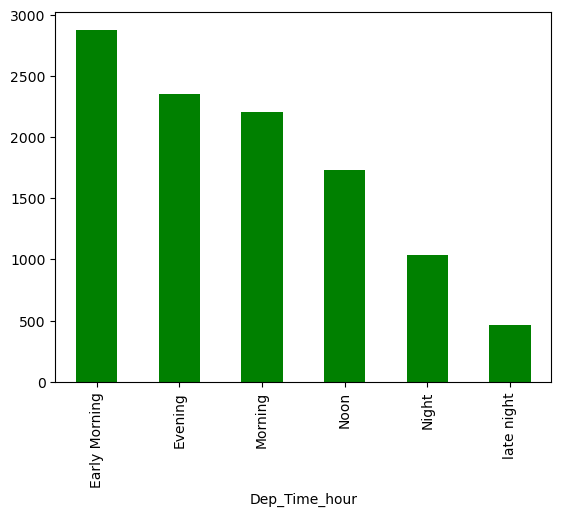

In [22]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [23]:
#### how to make above graph interactive , lets use Cufflinks & plotly to make it interactive !

In [24]:
#!pip install plotly
#!pip install chart_studio
#!pip install cufflinks

In [25]:
## how to use Plotly interactive plots directly with Pandas dataframes, First u need below set-up !

#import plotly
#import cufflinks as cf
#from cufflinks.offline import go_offline
#from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
#init_notebook_mode(connected=True)
#cf.go_offline()

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.


In [26]:
#data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

## 6.. Pre-process Duration Feature & extract meaningful features from it..

### Lets Apply pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values , 
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [27]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [28]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [29]:
'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration 
    bcz it is string data so any how we have to convert it into numerical(integer of float) values

'''

'\n    Now after pre-processing duration feature , still my ml_model is not able to understand duration \n    bcz it is string data so any how we have to convert it into numerical(integer of float) values\n\n'

In [30]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [31]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

## 7.. Lets Analyse whether Duration impacts Price or not ?

In [32]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

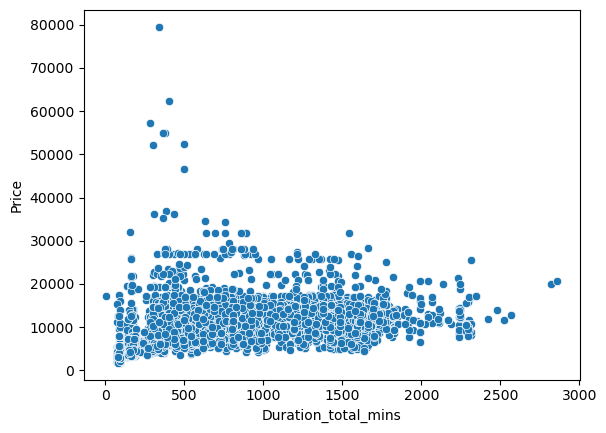

In [34]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

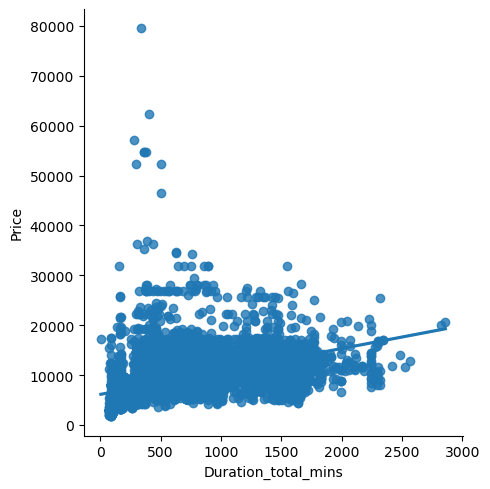

In [35]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.

In [36]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

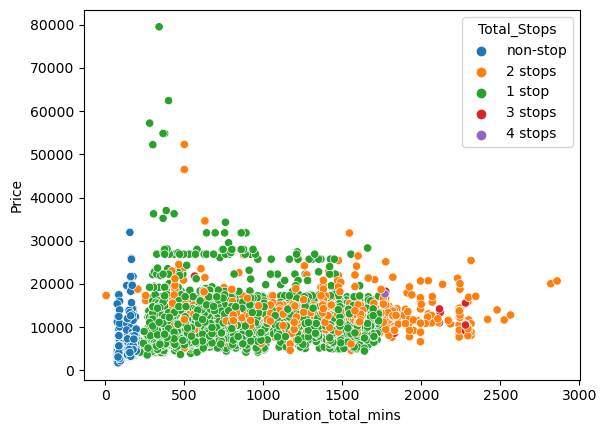

In [37]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

In [38]:
'''
Non stops flights take less duration while their fare is also low, then as the stop increases, 
duration also increases and price also increases(in most of the cases)

'''

'\nNon stops flights take less duration while their fare is also low, then as the stop increases, \nduration also increases and price also increases(in most of the cases)\n\n'

## 8.. on which route Jet Airways is extremely used?

### b.. Performing Airline vs Price Analysis.. 
        ie find price distribution & 5-point summary of each Airline..

In [39]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

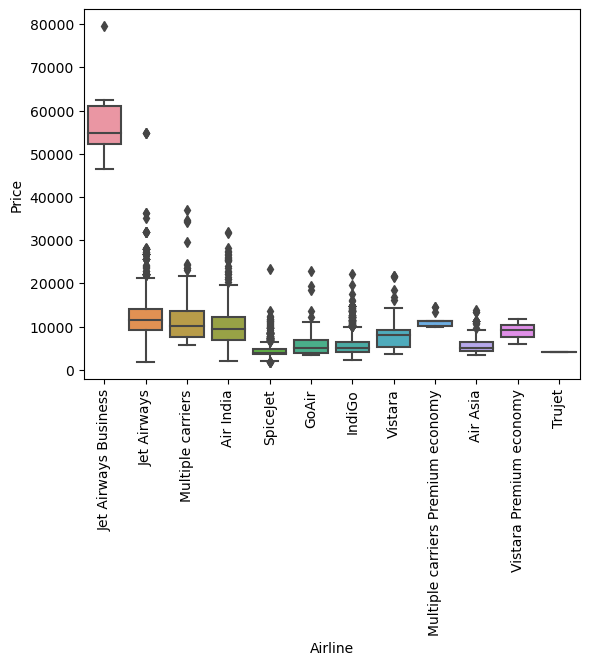

In [40]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [41]:
'''

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
              Apart from the first Airline almost all are having similar median

'''

'\n\nConclusion--> From graph we can see that Jet Airways Business have the highest Price., \n              Apart from the first Airline almost all are having similar median\n\n'

## 9.. Applying one-hot Encoding on data..

In [42]:
'''

Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, educational level,blood type etc.. 


Numerical data refers to the data that is in the form of numbers, 
Examples of numerical data are height, weight, age etc.. 

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  
For example, salary levels and performance classifications are discrete variables, 
whereas height and weight are continuous variables.

'''

'\n\nCategorical data refers to a data type that can be stored into groups/categories/labels \nExamples of categorical variables are  age group, educational level,blood type etc.. \n\n\nNumerical data refers to the data that is in the form of numbers, \nExamples of numerical data are height, weight, age etc.. \n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. \n                In case of infinity, these numbers will keep going on...\n                age of a fly : 8 , 9 day etc..\n                \nContinuous data : which is continuous in nature \n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n                  \nFor example, salary levels and performance classifications are discrete variables, \nwhereas height and weight are continuous variables.\n\n'

In [43]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [44]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

#### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
    But in real-world , it is not necessary that u have to always One-hot or label , 
    hence we will discuss more interesting approaches in upcoming sessions to do this !

In [45]:
### Applying One-hot from scratch :

In [46]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

## 10.. Lets Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [47]:
'''

Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create 
curse of dimensionality issue , which leads to usage of more resources of your pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding ! 


'''

'\n\nNow on 2 features , Airline & Destination , we can apply on-hot as there is no such order\nbut total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..\nsimilarly if we have any feature which have more categories , it is not good to apply one-hot as it will create \ncurse of dimensionality issue , which leads to usage of more resources of your pc..\n\nSo we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding ! \n\n\n'

In [48]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [49]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [50]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [51]:
### now lets perform Target Guided Mean encoding on 'Destination' ..

In [52]:
'''

till now,Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar) 
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same

but in future , these conditions may change..


'''

'\n\ntill now,Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar) \nwhich is neighbouring part of Delhi so we will consider New Delhi & Delhi as same\n\nbut in future , these conditions may change..\n\n\n'

In [53]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [54]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [55]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [56]:
data['Destination'] = data['Destination'].map(dict_dest)

## 11.. Perform Label(Manual) Encoding on Data

In [57]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
# Here Values are assigned with corresponding key

In [58]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [59]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

### b.. Remove Un-necessary features 

In [60]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [61]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [62]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [63]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [64]:
data['Journey_year'].unique()

array([2019])

In [65]:
'''

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature 
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

'''

'\n\nlets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..\nAdditional_Info contains almost 80% no_info , so we can drop this column ..\nlets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"\nLets drop "Source" feature as well as we have already perform feature encoding on this Feature \nlets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..\n\n'

In [66]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year', 'Route', 'Duration'] , axis=1 , inplace=True)

In [67]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


## 12.. Lets Perform outlier detection !

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [68]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2, orient="h")
    sns.distplot(df[col] , ax=ax3 , kde=False)

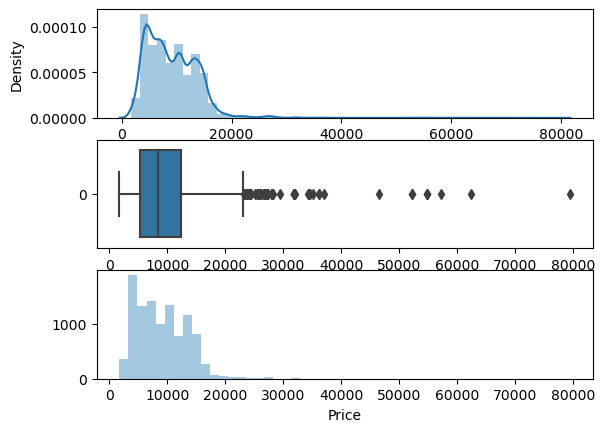

In [69]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR 
          


In [70]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

### b.. How to deal with Outlier

In [71]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

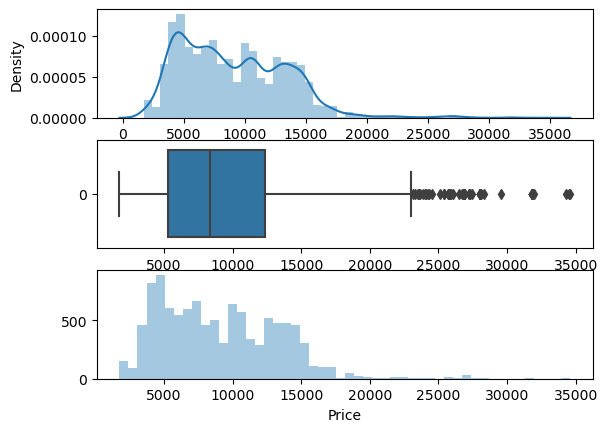

In [72]:
plot(data , 'Price')

## 13.. Lets Perform feature selection

In [73]:
'''
    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
    
    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features
    
'''

'\n    : Feature Selection\n    Finding out the best feature which will contribute and have good relation with target variable. \n    \n    \n    Q-> Why to apply Feature Selection?\n    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features\n    \n'

In [74]:
X = data.drop(['Price'] , axis=1)

In [75]:
y = data['Price']

In [76]:
from sklearn.feature_selection import mutual_info_regression

In [77]:
imp = mutual_info_regression(X , y)

In [78]:
'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

'''


'\nEstimate mutual information for a continuous target variable.\n\nMutual information between two random variables is a non-negative\nvalue, which measures the dependency between the variables. \nIf It is equal to zero it means two random variables are independent, and higher\nvalues mean higher dependency.\n\n'

In [79]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [80]:
imp_df.columns = ['importance']

In [81]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.003419
Airline,0.966088
Total_Stops,0.787126
Journey_month,0.624971
Source_Delhi,0.517620
Duration_hours,0.469987
Source_Kolkata,0.453543
Arrival_Time_hour,0.396868
Source_Banglore,0.385388
Duration_mins,0.338549


## 14.. Lets Build ML model

#### split dataset into train & test

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
ml_model = RandomForestRegressor()

In [86]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [87]:
y_pred = ml_model.predict(X_test)

In [88]:
from sklearn import metrics

In [89]:
metrics.r2_score(y_test , y_pred)

0.8093805428350219

### b.. Lets Save model

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [90]:
#!pip install pickle

In [91]:
import pickle

In [92]:
# dump information to that file
pickle.dump(ml_model , open('rf_random.pkl','wb'))

In [93]:
#model = open('rf_random.pkl' , 'rb')

In [94]:
#forest = pickle.load(model)

## 15.. How to automate ml pipeline & How to define your Evaluation metric..

### a.. how to make our own metric...

In [95]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### b.. How to automate ml pipeline !

In [96]:
'''

    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--
    
    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


'''

'\n\n    Lets automate all the stuffs..\n    let say ,I will just pass ml algo & i get several results like--\n    \n    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error\n\n\n'

In [97]:
from sklearn import metrics

In [102]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_prediction = model.predict(X_test)
    print('r2 score : {}'.format(metrics.r2_score(y_test , y_prediction)))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_prediction)))
    print('MAPE : {}'.format(mape(y_test , y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score : 0.9518577077576201
r2 score : 0.8115881817908581
MAE : 1176.869207422003
MSE : 3667925.8491313746
MAPE : 13.215128220791161


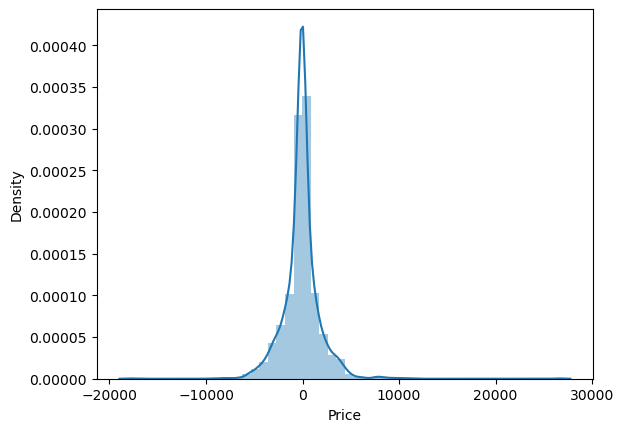

In [103]:
predict(RandomForestRegressor())

In [104]:
#from sklearn.tree import DecisionTreeRegressor

In [105]:
#predict(DecisionTreeRegressor())

## 16.. how to hypertune ml model

In [106]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics 
## & based on domain expertise knowledge Then I can say ya this model perfoms best

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model 
    4.Check best parameters and best score

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [109]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [110]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [111]:

## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [112]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [114]:
#### In your case , may be your parameters may vary a little bit , thats not a major issue..

In [115]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=10)

In [116]:
rf_random.best_score_

0.8152003923285395

In [117]:
pickle.dump(rf_random , open('rf_random.pkl','wb'))